# Keras

Keras es una biblioteca para manipular redes neuronales. Es una capa de alto nivel por arriba de Theano (o de TensorFlow).

## Ejemplo simple

Construcción de una red neuronal:

In [7]:
%matplotlib inline
from keras.layers import Dense, Activation
from keras.models import Sequential

model = Sequential()

model.add(Dense(output_dim=2, input_dim=5))
model.add(Activation("sigmoid"))
model.add(Dense(output_dim=1))
model.add(Activation("sigmoid"))

La podemos visualizar:

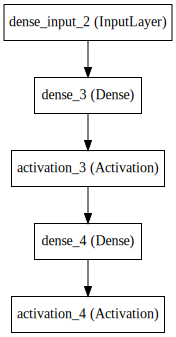

In [30]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

Luego hay que compilar:

In [28]:
model.compile(loss='mean_squared_error', optimizer='sgd')

Usamos un conjunto de datos de ejemplo:

In [20]:
import numpy as np

def dataset(n_train, n_test):
    n = n_train + n_test
    points = np.random.uniform(-3, 3, [n, 2])
    features = np.c_[points, points[:, 0]**2, points[:, 1]**2, points[:, 0] * points[:, 1]]
    labels = (np.linalg.norm(points, axis=1) > 2).astype(int)
    return (features[:n_train], labels[:n_train]), (features[n_train:], labels[n_train:])

(X_train, y_train), (X_test, y_test) = dataset(800, 200)

Entrenamos la red:

In [29]:
model.fit(X_train, y_train, nb_epoch=5, batch_size=32)

Epoch 1/5
800/800 [==============================] - 0s - loss: 0.2515     
Epoch 2/5
800/800 [==============================] - 0s - loss: 0.2488     
Epoch 3/5
800/800 [==============================] - 0s - loss: 0.2464     
Epoch 4/5
800/800 [==============================] - 0s - loss: 0.2441     
Epoch 5/5
800/800 [==============================] - 0s - loss: 0.2419     


Luego evaluamos:

In [32]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)

 32/200 [===>..........................] - ETA: 0s

In [38]:
y_eval = model.predict_classes(X_test, batch_size=32)
probability = model.predict_proba(X_test, batch_size=32)

 32/200 [===>..........................] - ETA: 0s

In [39]:
# graficar